In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Send an HTTP GET request to the website
url = 'https://masoko.com'  # Replace with the URL of the website you want to scrape
response = requests.get(url)

In [10]:
# Parse the HTML content of the page
soup = BeautifulSoup(response.text, 'html.parser')
print(soup)

<!DOCTYPE html>
<html data-reactroot="" lang="en"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><title data-react-helmet="true">Shop Online for Mobile Devices &amp; Accessories | Masoko</title><meta content="minimum-scale=1, initial-scale=1, width=device-width, shrink-to-fit=no" data-react-helmet="true" name="viewport"/><meta content="#da005e" data-react-helmet="true" name="theme-color"/><meta content="telephone=yes" data-react-helmet="true" name="format-detection"/><meta content="Shop Online for Mobile Devices &amp; Accessories| Masoko" data-react-helmet="true" property="og:title"/><meta content="website" data-react-helmet="true" property="og:type"/><meta content="Browse &amp; shop from a wide variety of phones and accessories. Safe and secure payments via M-Pesa, credit &amp; debit cards. Sign up today." data-react-helmet="true" property="og:description"/><meta content="/" data-react-helmet="true" property="og:url"/><meta content="/

In [11]:
# Identify the HTML elements containing the data you want to scrape
product_names = []
product_prices = []

In [21]:
# Use BeautifulSoup to extract data
product_elements = soup.find_all('li', class_='productListingList')
for product in product_elements:
    name = product.find('div', class_='product-card-title').text.strip()
    price = product.find('div', class_='product-card-price').text.strip()
    product_names.append(name)
    product_prices.append(price)
    print(product)

In [13]:
# Create a Pandas DataFrame to store the scraped data
data = {'Product Name': product_names, 'Price': product_prices}
df = pd.DataFrame(data)

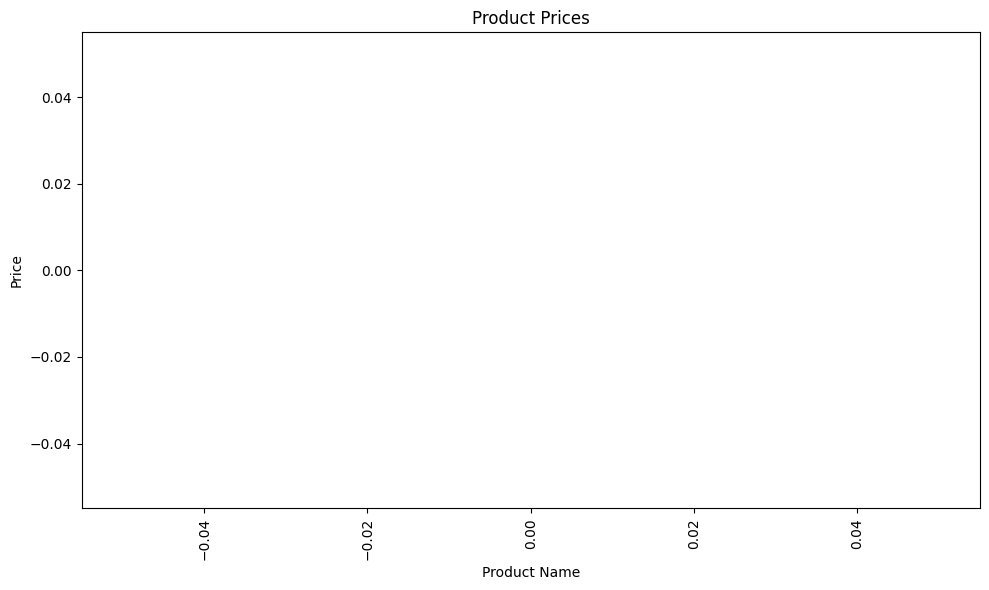

In [14]:
# Data Visualization
# Let's create a bar chart to visualize product prices
plt.figure(figsize=(10, 6))
plt.bar(df['Product Name'], df['Price'])
plt.xlabel('Product Name')
plt.ylabel('Price')
plt.title('Product Prices')
plt.xticks(rotation=90)
plt.tight_layout()

In [15]:
# Show the plot
plt.show()

In [16]:
# Save the DataFrame to a CSV file (optional)
df.to_csv('product_data.csv', index=False)